In [22]:
import os
import sys
from pathlib import Path

import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
ds0 = xr.load_dataset("xboutput.nc")
ds1 = xr.load_dataset("xboutput2.nc")

print(ds1)
print(ds1.keys())

<xarray.Dataset> Size: 73kB
Dimensions:      (ny: 1, nx: 326, globaltime: 2)
Coordinates:
    globalx      (ny, nx) float64 3kB -6.59 0.5 7.59 ... 1.468e+03 1.47e+03
    globaly      (ny, nx) float64 3kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * globaltime   (globaltime) float64 16B 0.0 3.6e+03
Dimensions without coordinates: ny, nx
Data variables: (12/15)
    _parameters  float64 8B 9.969e+36
    x            (globaltime, ny, nx) float64 5kB -6.59 0.5 ... 1.47e+03
    y            (globaltime, ny, nx) float64 5kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    zb           (globaltime, ny, nx) float64 5kB -9.996 -9.941 ... 13.25 13.25
    zs           (globaltime, ny, nx) float64 5kB -0.06856 -0.06657 ... nan nan
    H            (globaltime, ny, nx) float64 5kB 0.0 0.0 0.0 ... nan nan nan
    ...           ...
    Sxx          (globaltime, ny, nx) float64 5kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Sxy          (globaltime, ny, nx) float64 5kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Syy          (globaltime, ny, 

[-9.53165396 -9.48123116 -9.33631078 -9.27460609 -9.31719626 -9.30561746
 -9.25943119 -9.2185122  -9.18521645 -9.15975776 -9.13484188 -9.10486503
 -9.0724423  -9.03714445 -9.00071106 -8.96317796 -8.92148271 -8.8651096
 -8.82961916 -8.83233919 -8.82558134 -8.81005261 -8.78601484 -8.75541958
 -8.71791314 -8.67455521 -8.62590949 -8.57587443 -8.52426488 -8.47180427
 -8.4190888  -8.36564454 -8.31147754 -8.25611252 -8.20189689 -8.14742483
 -8.09238584 -8.03656252 -7.97975782 -7.92491356 -7.86948181 -7.81396468
 -7.75902003 -7.70500183 -7.65182114 -7.59863239 -7.54532995 -7.49286929
 -7.4398349  -7.38623867 -7.33308524 -7.28483051 -7.22762556 -7.25459072
 -7.20320976 -7.13908468 -7.07496601 -7.01083598 -6.94894433 -6.88789619
 -6.8271356  -6.76324678 -6.69778033 -6.63296914 -6.5681028  -6.50320588
 -6.43925647 -6.3743946  -6.31051897 -6.24684365 -6.18549215 -6.12456056
 -6.06364718 -6.00368878 -5.94473241 -5.88772901 -5.83177339 -5.77681802
 -5.72380831 -5.67279254 -5.62377297 -5.57768744 -5.

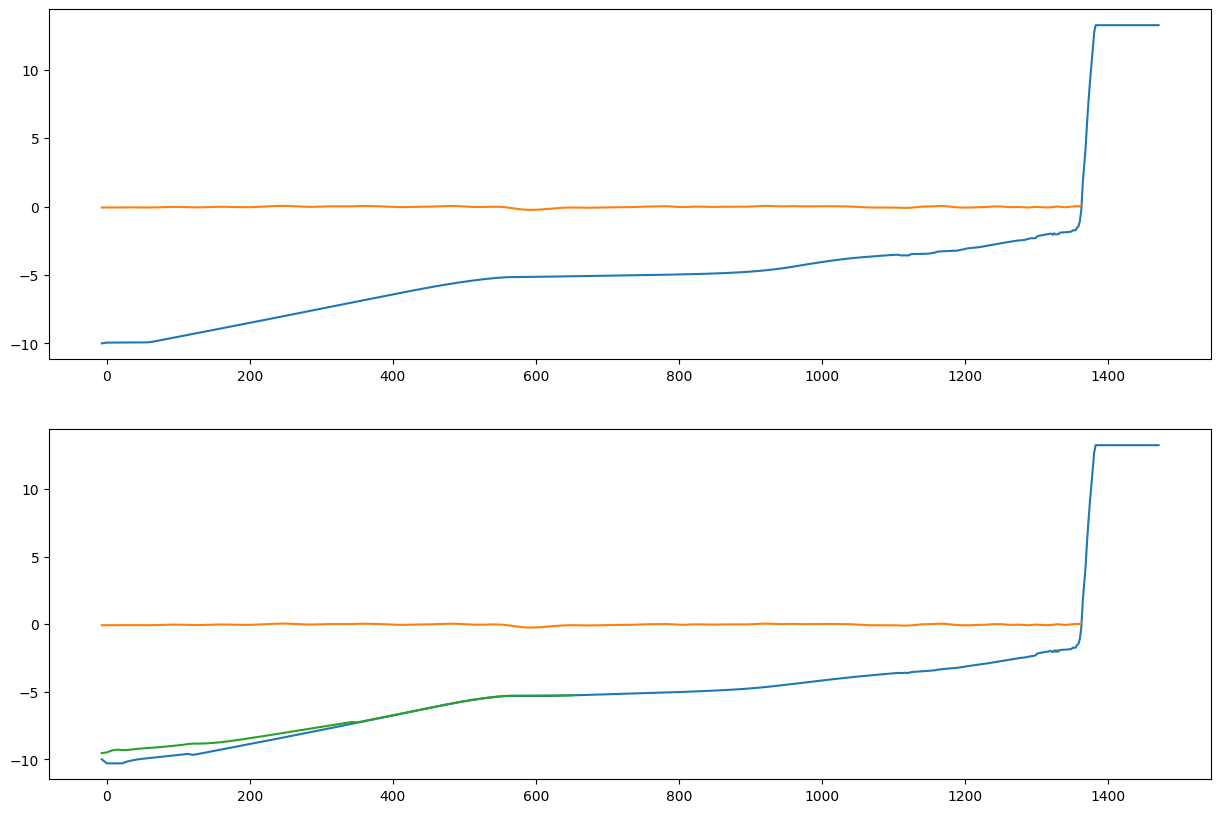

In [39]:
fig, ax = plt.subplots(2, 1, figsize=(15,10))

ax[0].plot(ds0.globalx.values[0], ds0.zb.values[-1,0,:])
ax[0].plot(ds0.globalx.values[0], ds0.zs.values[-1,0,:])

ax[1].plot(ds1.globalx.values[0], ds1.zb.values[-1,0,:])

ax[1].plot(ds1.globalx.values[0], ds1.zs.values[0,0,:], label='start')
ax[1].plot(ds1.globalx.values[0], ds1.zs.values[-1,0,:], label='end')

# print(ds.zb.values[-1,0,:])
print(ds1.zs.values[-1,0,:])

In [4]:
740 % 360

20

In [5]:
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 2, 3, 4, 5])

gradient = np.gradient(y, x)  #  = dy/dx
angle = np.arctan(gradient) / (2 * np.pi) * 360

print(gradient)
print(angle)

[1. 1. 1. 1. 1. 1.]
[45. 45. 45. 45. 45. 45.]


In [6]:
x = np.array([-2, -1, 0, 1, 2])
y = x**2

gradient = np.gradient(y, x)  #  = dy/dx
angle = np.arctan(gradient) / (2 * np.pi) * 360

print(gradient)
print(angle)

[-3. -2.  0.  2.  3.]
[-71.56505118 -63.43494882   0.          63.43494882  71.56505118]


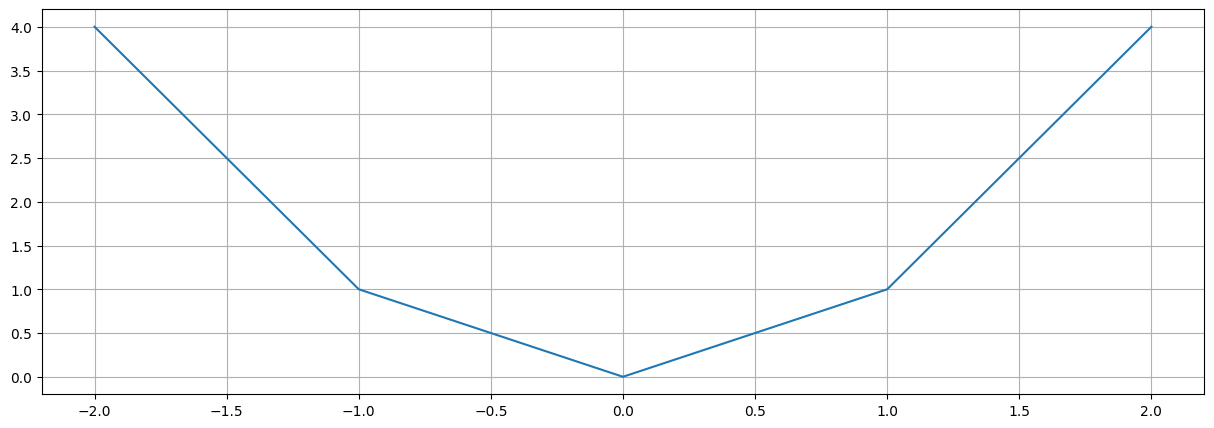

In [7]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x, y)
ax.grid()

In [12]:
ds = xr.load_dataset('xboutput.nc')

print(ds)

<xarray.Dataset> Size: 73kB
Dimensions:      (ny: 1, nx: 326, globaltime: 2)
Coordinates:
    globalx      (ny, nx) float64 3kB -6.59 0.5 7.59 ... 1.468e+03 1.47e+03
    globaly      (ny, nx) float64 3kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
  * globaltime   (globaltime) float64 16B 0.0 3.6e+03
Dimensions without coordinates: ny, nx
Data variables: (12/15)
    _parameters  float64 8B 9.969e+36
    x            (globaltime, ny, nx) float64 5kB -6.59 0.5 ... 1.47e+03
    y            (globaltime, ny, nx) float64 5kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    zb           (globaltime, ny, nx) float64 5kB -10.0 -10.0 ... 13.25 13.25
    zs           (globaltime, ny, nx) float64 5kB 0.0003256 0.0003256 ... nan
    H            (globaltime, ny, nx) float64 5kB 0.0 0.0 0.0 ... nan nan nan
    ...           ...
    Sxx          (globaltime, ny, nx) float64 5kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Sxy          (globaltime, ny, nx) float64 5kB 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Syy          (globaltime, ny, nx) 

[-10.         -10.         -10.         -10.         -10.
 -10.         -10.         -10.         -10.         -10.
  -9.957       -9.886       -9.816       -9.746       -9.676
  -9.606       -9.536       -9.467       -9.398       -9.329
  -9.26        -9.191       -9.123       -9.055       -8.987
  -8.919       -8.851       -8.784       -8.717       -8.65
  -8.583       -8.516       -8.45        -8.384       -8.318
  -8.252       -8.187       -8.121       -8.056       -7.991
  -7.927       -7.862       -7.798       -7.734       -7.67
  -7.607       -7.543       -7.48        -7.417       -7.355
  -7.292       -7.23        -7.168       -7.106       -7.044
  -6.983       -6.922       -6.861       -6.8         -6.74
  -6.68        -6.62        -6.56        -6.501       -6.441
  -6.382       -6.323       -6.265       -6.207       -6.148
  -6.091       -6.033       -5.975       -5.918       -5.861
  -5.805       -5.748       -5.692       -5.636       -5.58
  -5.525       -5.47        -5.415

(1300.0, 1400.0)

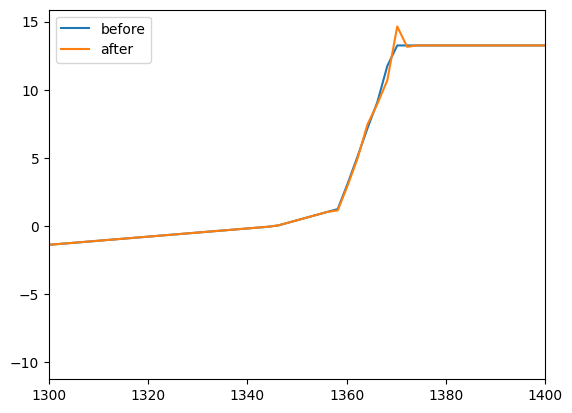

In [21]:
# print(ds.globalx.values[0])
print(ds.zb.values[1,0,:])


plt.plot(ds.globalx.values[0], ds.zb.values[0,0,:], label='before')
plt.plot(ds.globalx.values[0], ds.zb.values[1,0,:], label='after')

plt.legend()
plt.xlim((1300, 1400))